# **3) Ratio Data**

##### *À quoi ressemblent nos df ?*
##### <span style='color:red'>**Modifier data ici ↓**</span>

In [1]:
import pandas as pd

prix_metre_carre_louer = pd.read_csv('1_useful_data/2_mean_data/Prix_metre_carre_louer.csv')
prix_metre_carre_acheter = pd.read_csv('1_useful_data/2_mean_data/Prix_metre_carre_acheter.csv')

prix_metre_carre_louer.head(7)

,ville,canton,prix_metre_carre_moyen
0,Aadorf,TG,15.049751
1,Aarau,AG,0.000000
2,Aarburg,AG,16.863430
3,Aefligen,BE,0.000000
4,Aire-la-Ville,GE,0.000000
5,Allaman,VD,0.000000
6,Alle,JU,13.584906


In [2]:
prix_metre_carre_acheter.head(7)

,ville,canton,prix_metre_carre_moyen
0,Aarburg,AG,6699.134199
1,Aclens,VD,8559.539052
2,Acquarossa,TI,4433.638444
3,Adligenswil,LU,0.000000
4,Aesch,ZH,0.000000
5,Aeschi,SO,0.000000
6,Aeschi bei Spiez,BE,0.000000


---

##### **Définition de la fonction Ratio_prix_metre_carre**

In [3]:
def ratio_prix_metre_carre(df_prix_metre_carre_louer, df_prix_metre_carre_acheter):

    #Supprime les villes où prix_metre_carre_moyen est égal à 0 pour le df Prix_metre_carre_louer
    Prix_metre_carre_louer = df_prix_metre_carre_louer[df_prix_metre_carre_louer['prix_metre_carre_moyen'] != 0]

    #Supprime les villes où prix_metre_carre_moyen est égal à 0 pour le df Prix_metre_carre_acheter
    Prix_metre_carre_acheter = df_prix_metre_carre_acheter[df_prix_metre_carre_acheter['prix_metre_carre_moyen'] != 0]

    #Fusionne les dfs où le pmc est différent de 0
    df_merged = pd.merge(Prix_metre_carre_louer, Prix_metre_carre_acheter, on=['ville', 'canton'], suffixes=('_louer', '_acheter'))

    #Calcule le ratio et ajoute une colonne
    #df_merged['ratio*100'] = df_merged['prix_metre_carre_moyen_louer'] / df_merged['prix_metre_carre_moyen_acheter'] *100

    #Calcule le ROI en % et ajoute une colonne
    df_merged['ROI'] = df_merged['prix_metre_carre_moyen_louer']*12 *100 / df_merged['prix_metre_carre_moyen_acheter']

    # Ajoute une colonne 'color' en fonction du ROI
    df_merged['color'] = df_merged['ROI'].apply(lambda x: '#ff0000' if x < 2 else
                                                '#ffa700' if 2 <= x < 3 else
                                                '#fff400' if 3 <= x < 4 else
                                                '#99ff00' if 4 <= x < 5 else
                                                '#2cba00' if 5 <= x < 6 else
                                                '#17c1ff')

    #Arrondi la les colonnes à deux décimales
    df_merged = df_merged.round(4)


    return df_merged



---

### ***Ratio Immobilier.ch Louer et Acheter*** 

In [4]:
df_ratio_prix_metre_carre = ratio_prix_metre_carre(prix_metre_carre_louer,prix_metre_carre_acheter,)
df_ratio_prix_metre_carre.head(10)

,ville,canton,prix_metre_carre_moyen_louer,prix_metre_carre_moyen_acheter,ROI,color
0,Aarburg,AG,16.8634,6699.1342,3.0207,#fff400
1,Alle,JU,13.5849,4592.5926,3.5496,#fff400
2,Altstätten,SG,14.2241,4348.9440,3.9249,#fff400
3,Amriswil,TG,15.0246,7283.6735,2.4753,#ffa700
4,Anières,GE,28.6277,17719.6219,1.9387,#ff0000
5,Arbedo-Castione,TI,15.1890,5670.6204,3.2143,#fff400
6,Ardon,VS,17.6667,4879.8672,4.3444,#99ff00
7,Arzier-Le Muids,VD,29.0021,9049.4812,3.8458,#fff400
8,Attalens,FR,15.7559,7465.1925,2.5327,#ffa700
9,Avenches,VD,16.5182,6955.4540,2.8498,#ffa700


In [5]:
#Pour combien de villes on a un ratio
print(len(df_ratio_prix_metre_carre))

244


In [6]:
#Création du nouveau fichier CSV avec le ratio par ville
df_ratio_prix_metre_carre.to_csv('1_useful_data/3_ratio/Ratio_prix_metre_carre.csv', index=False)

ㅤ

---

##### ***Choisir la couleur en fonction du ROI***

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

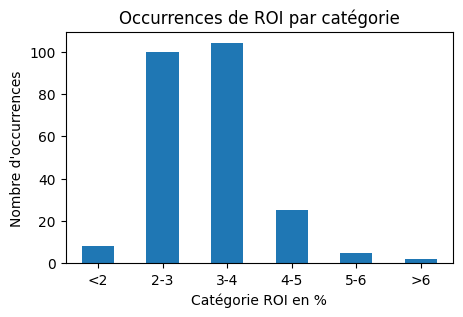

In [8]:
# Définir les catégories
bins = [0.0, 2.0, 3.0, 4.0, 5.0, 6.0, float('inf')]

# Ajouter une nouvelle colonne 'categorie_ROI' basée sur les intervalles définis
df_ratio_prix_metre_carre['categorie_ROI'] = pd.cut(df_ratio_prix_metre_carre['ROI'], bins=bins, labels=['<2', '2-3', '3-4', '4-5', '5-6', '>6'], right=False)

# Compter le nombre d'occurrences dans chaque catégorie
occurrences_par_categorie = df_ratio_prix_metre_carre['categorie_ROI'].value_counts().sort_index()


# Créer le diagramme à barres
plt.figure(figsize=(5,3))
occurrences_par_categorie.plot(kind='bar', rot=0)
plt.xlabel('Catégorie ROI en %')
plt.ylabel('Nombre d\'occurrences')
plt.title('Occurrences de ROI par catégorie')
plt.show()
